In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Path similarity 
- Using the snakemake pipeline from ../scripts/
- Core if gfastats ps 

In [16]:
# Data is here
f = "../results/ps/chr1.gfastats.ps.txt"
fpath = "/".join(f.split("/")[:-1])

In [17]:
# Read in file
df = pd.read_csv(f, sep = "\t")
df.head()

,Accession,Node:0,Node:1,Node:2,Node:3,Node:4,Node:5,Node:6,Node:7,Node:8,...,Seq:18,Seq:19,Seq:20,Seq:21,Seq:22,Seq:23,Seq:24,Seq:25,Seq:26,Seq:27
0,10002_Chr1,20107,14128,13356,12644,13953,15654,15736,17822,20284,...,280599,368216,301955,347195,398201,490713,700141,1023627,1675405,20224417
1,10015_Chr1,17788,13725,18054,16152,18523,15653,19401,18816,16665,...,242100,253752,297705,319846,368006,469443,667752,1013401,1652219,20224417
2,10024_Chr1,40947,31471,19017,17862,18847,17422,19955,20494,20674,...,215281,224315,216174,257914,319285,406790,591605,905471,1558870,20224417
3,1741_Chr1,20988,17265,16231,19253,18473,16622,16444,19572,21346,...,266741,338106,290569,341242,393060,484896,708170,1013073,1676369,20224417
4,22001_Chr1_mod2,10347,27262,20052,18521,20103,18889,19665,20630,16481,...,244140,249569,301979,291049,364159,463477,691487,1005442,1689022,20224417


In [18]:
# Sequence starts here
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

29

In [19]:
# Data starts here
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Node")][0]+1
start_index

2

In [20]:
# Node stats
node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_priv = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [21]:
df2 = pd.DataFrame([node_core, node_soft, node_priv]).T
df2.head()

,0,1,2
0,732292,1479142,14128
1,732292,1423935,13725
2,732292,1341933,31471
3,732292,1486379,17265
4,732292,1424156,27262


In [22]:
# Change index and column name
df2.columns = ["Core", "Soft", "Private"]
df2.index = [x.split("_")[0] for x in df["Accession"]]
df2.head()

,Core,Soft,Private
10002,732292,1479142,14128
10015,732292,1423935,13725
10024,732292,1341933,31471
1741,732292,1486379,17265
22001,732292,1424156,27262


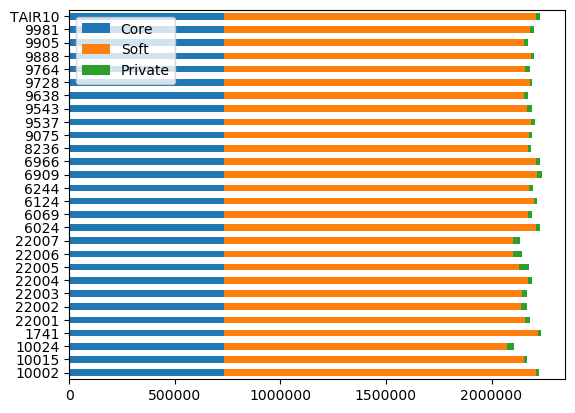

In [23]:
# Check the plot
df2.plot(kind = "barh", stacked = True)

In [24]:
dfs = []
chrom = [1,2,3,4,5]
for x in chrom: 
    ftemp = fpath + "/chr" + str(x) + ".gfastats.ps.txt"
    dftemp = pd.read_csv(ftemp, sep = "\t")
    seq_soft = dftemp.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
    seq_core = dftemp.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
    seq_priv = dftemp.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)
    df2t = pd.DataFrame([seq_core, seq_soft, seq_priv]).T
    df2t
    df2t.columns = ["Core", "Soft", "Private"]
    df2t.index = [x.split("_")[0] for x in df["Accession"]]
    dfs.append(df2t)

In [25]:
len(dfs[0])

28

In [26]:
merged_df = pd.concat(dfs, axis=0, ignore_index=False)
merged_df_sum = merged_df.groupby(merged_df.index, axis=0).sum()

merged_df_sum

,Core,Soft,Private
10002,76888804,38668300,2474567
10015,76888804,39018721,1379997
10024,76888804,37126956,2873481
1741,76888804,39225119,1524518
22001,76888804,39075210,1740409
22002,76888804,38504130,1544334
22003,76888804,36744756,3805970
22004,76888804,38416930,3482908
22005,76888804,39982264,1616886
22006,76888804,39025739,1103970


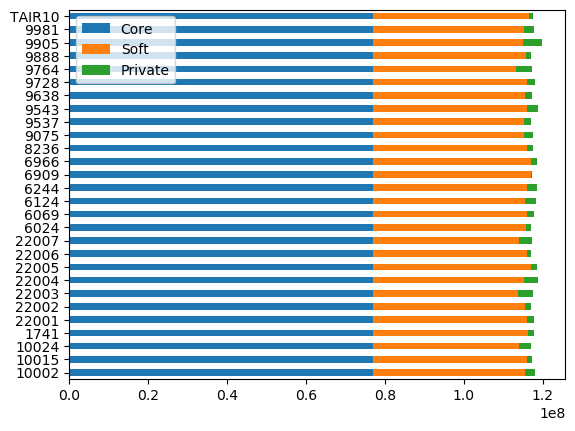

In [27]:
# Just check this
merged_df_sum.plot(kind = "barh", stacked = True)

In [28]:
merged_df_sum_div = merged_df_sum/1000000

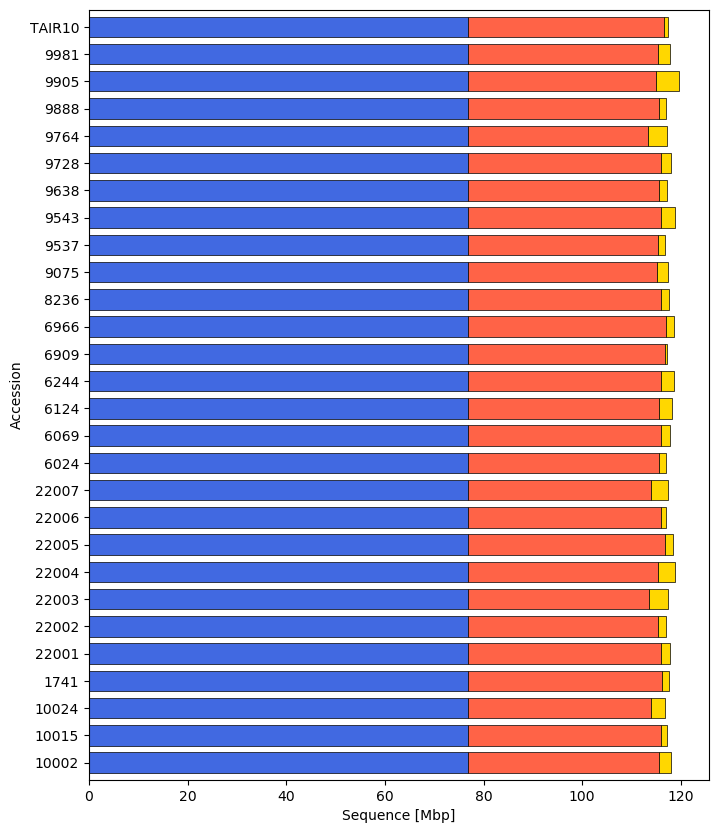

In [29]:
merged_df_sum_div.plot(kind = "barh", stacked = True, figsize = (8,10), width = 0.75, legend = False,
                       edgecolor = "black",
                      linewidth = 0.5, 
                      color = ["royalblue", "tomato", "gold"])
plt.xlabel("Sequence [Mbp]")
plt.ylabel("Accession")
plt.savefig("plots/barplot/similarity_path.1000.png", dpi = 1000)
plt.savefig("plots/barplot/similarity_path.400.png", dpi = 400)
plt.savefig("plots/barplot/similarity_path.svg")
